In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
import re
import os
sns.set()
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
warnings.filterwarnings("ignore")

sns.__version__

'0.11.0'

In [2]:
data=pd.read_csv("D:/python/MARKET ANALYTICS/marketing_data.csv", index_col="ID", parse_dates=["Dt_Customer"])

In [3]:
data=data.rename(columns={'Dt_Customer':'Enrollment date',
    'Recency':'Days since last purchase',
    ' Income ':'Income'})



In [4]:
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Enrollment date,Days since last purchase,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
1826,1970,Graduation,Divorced,"$84,835.00",0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1961,Graduation,Single,"$57,091.00",0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
10476,1958,Graduation,Married,"$67,267.00",0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
1386,1967,Graduation,Together,"$32,474.00",1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
5371,1989,Graduation,Single,"$21,474.00",1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10142,1976,PhD,Divorced,"$66,476.00",0,1,2013-03-07,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US
5263,1977,2n Cycle,Married,"$31,056.00",1,0,2013-01-22,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP
22,1976,Graduation,Divorced,"$46,310.00",1,0,2012-12-03,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP


In [5]:
data.shape

(2240, 27)

In [6]:
#removing the $ from income
data["Income"]=data["Income"].str.replace(r"$","")

In [7]:
# other way of removing $ from income
def extract (x):
    if x is np.nan : return np.nan
    return (re.sub(r"$","",str(x)))

data["Income"]=data["Income"].apply(extract)


#removing ',' and ".00" in income
data["Income"]=data["Income"].str.replace(r",","")
data["Income"]=data["Income"].str.split(".", n = 1, expand = True)



In [8]:
data["Income"].isnull().sum()

24

In [9]:
data[["Income"]].isnull().sum()

Income    24
dtype: int64

In [10]:
Customer=data.loc[:,:"Days since last purchase"].join(data[["Country"]])
Products=data.loc[:,"MntWines":"MntGoldProds"]
Purchases=data.loc[:,"NumDealsPurchases":"NumWebVisitsMonth"]
Campaigns=data.loc[:,"AcceptedCmp3":"AcceptedCmp2"]
Misc=data.loc[:,["Response","Complain"]]

In [11]:
print(data["Income"].isnull().sum())
pd.DataFrame(data[data.isna()].sum(), columns=["Null Vlaues"])

24


,Null Vlaues
Year_Birth,0.0
Education,0.0
Marital_Status,0.0
Income,0.0
Kidhome,0.0
Teenhome,0.0
Days since last purchase,0.0
MntWines,0.0
MntFruits,0.0
MntMeatProducts,0.0


In [12]:
category=data.select_dtypes(include="object")
numeric=data.select_dtypes(exclude="object")

In [13]:
for i in category.columns:
    print(category[i].value_counts())
    print("**************")

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
**************
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
**************
7500     12
35860     4
18929     3
80134     3
18690     3
         ..
33402     1
36930     1
80067     1
61996     1
51141     1
Name: Income, Length: 1974, dtype: int64
**************
SP     1095
SA      337
CA      268
AUS     160
IND     148
GER     120
US      109
ME        3
Name: Country, dtype: int64
**************


In [14]:
category

,Education,Marital_Status,Income,Country
ID,,,,
1826,Graduation,Divorced,84835,SP
1,Graduation,Single,57091,CA
10476,Graduation,Married,67267,US
1386,Graduation,Together,32474,AUS
5371,Graduation,Single,21474,SP
...,...,...,...,...
10142,PhD,Divorced,66476,US
5263,2n Cycle,Married,31056,SP
22,Graduation,Divorced,46310,SP


In [15]:
df = numeric.describe()

def custom_style(row):
    
    color = 'white'
    if row.name == 'min' or row.name == 'max':
        color = 'darkkhaki'

    return ['background-color: %s' % color]*len(row.values)

df.style.apply(custom_style, axis=1)

,Year_Birth,Kidhome,Teenhome,Days since last purchase,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
# filling missing values
from sklearn.impute import KNNImputer
numeric_before_impute=numeric.drop(["Year_Birth","Enrollment date"],axis=1).copy()

imputer=KNNImputer(missing_values=np.nan)
numeric_imputed=imputer.fit_transform(numeric_before_impute)

numeric_imputed=pd.DataFrame(numeric_imputed, index=numeric_before_impute.index, 
                             columns=numeric_before_impute.columns).join(numeric[["Year_Birth","Enrollment date"]])
numeric_imputed

,Kidhome,Teenhome,Days since last purchase,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Year_Birth,Enrollment date
ID,,,,,,,,,,,,,,,,,,,,,,,
1826,0.0,0.0,0.0,189.0,104.0,379.0,111.0,189.0,218.0,1.0,4.0,4.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1970,2014-06-16
1,0.0,0.0,0.0,464.0,5.0,64.0,7.0,0.0,37.0,1.0,7.0,3.0,7.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1961,2014-06-15
10476,0.0,1.0,0.0,134.0,11.0,59.0,15.0,2.0,30.0,1.0,3.0,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1958,2014-05-13
1386,1.0,1.0,0.0,10.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1967,2014-05-11
5371,1.0,0.0,0.0,6.0,16.0,24.0,11.0,0.0,34.0,2.0,3.0,1.0,2.0,7.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1989,2014-04-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10142,0.0,1.0,99.0,372.0,18.0,126.0,47.0,48.0,78.0,2.0,5.0,2.0,11.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1976,2013-03-07
5263,1.0,0.0,99.0,5.0,10.0,13.0,3.0,8.0,16.0,1.0,1.0,0.0,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1977,2013-01-22
22,1.0,0.0,99.0,185.0,2.0,88.0,15.0,5.0,14.0,2.0,6.0,1.0,5.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1976,2012-12-03


In [17]:
numeric=numeric_imputed

In [18]:
# function for histogram and boxplot for outliers

def report(feature):
    fig, ax= plt.subplots(1,2)
    fig.set_size_inches(16,4)
    fig.suptitle(feature, fontsize=16)
    sns.histplot(data=numeric, x=feature, kde=True, ax=ax[0])
    sns.boxplot(data=numeric, x=feature, ax=ax[1])
    plt.show()
    
    print(numeric[feature].describe())

In [19]:
from datetime import date
Age =date.today().year-numeric["Year_Birth"]
numeric.insert(1, 'Age', Age,)



In [20]:
Enroll_at_age=numeric["Enrollment date"].dt.year-numeric["Year_Birth"]
numeric.insert(6, "Enroll_at_age",Enroll_at_age)

In [21]:
numeric

,Kidhome,Age,Teenhome,Days since last purchase,MntWines,MntFruits,Enroll_at_age,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Year_Birth,Enrollment date
ID,,,,,,,,,,,,,,,,,,,,,,,,,
1826,0.0,52,0.0,0.0,189.0,104.0,44,379.0,111.0,189.0,218.0,1.0,4.0,4.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1970,2014-06-16
1,0.0,61,0.0,0.0,464.0,5.0,53,64.0,7.0,0.0,37.0,1.0,7.0,3.0,7.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1961,2014-06-15
10476,0.0,64,1.0,0.0,134.0,11.0,56,59.0,15.0,2.0,30.0,1.0,3.0,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1958,2014-05-13
1386,1.0,55,1.0,0.0,10.0,0.0,47,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1967,2014-05-11
5371,1.0,33,0.0,0.0,6.0,16.0,25,24.0,11.0,0.0,34.0,2.0,3.0,1.0,2.0,7.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1989,2014-04-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10142,0.0,46,1.0,99.0,372.0,18.0,37,126.0,47.0,48.0,78.0,2.0,5.0,2.0,11.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1976,2013-03-07
5263,1.0,45,0.0,99.0,5.0,10.0,36,13.0,3.0,8.0,16.0,1.0,1.0,0.0,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1977,2013-01-22
22,1.0,46,0.0,99.0,185.0,2.0,36,88.0,15.0,5.0,14.0,2.0,6.0,1.0,5.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1976,2012-12-03


In [22]:
numeric

,Kidhome,Age,Teenhome,Days since last purchase,MntWines,MntFruits,Enroll_at_age,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Year_Birth,Enrollment date
ID,,,,,,,,,,,,,,,,,,,,,,,,,
1826,0.0,52,0.0,0.0,189.0,104.0,44,379.0,111.0,189.0,218.0,1.0,4.0,4.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1970,2014-06-16
1,0.0,61,0.0,0.0,464.0,5.0,53,64.0,7.0,0.0,37.0,1.0,7.0,3.0,7.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1961,2014-06-15
10476,0.0,64,1.0,0.0,134.0,11.0,56,59.0,15.0,2.0,30.0,1.0,3.0,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1958,2014-05-13
1386,1.0,55,1.0,0.0,10.0,0.0,47,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1967,2014-05-11
5371,1.0,33,0.0,0.0,6.0,16.0,25,24.0,11.0,0.0,34.0,2.0,3.0,1.0,2.0,7.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1989,2014-04-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10142,0.0,46,1.0,99.0,372.0,18.0,37,126.0,47.0,48.0,78.0,2.0,5.0,2.0,11.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1976,2013-03-07
5263,1.0,45,0.0,99.0,5.0,10.0,36,13.0,3.0,8.0,16.0,1.0,1.0,0.0,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1977,2013-01-22
22,1.0,46,0.0,99.0,185.0,2.0,36,88.0,15.0,5.0,14.0,2.0,6.0,1.0,5.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1976,2012-12-03


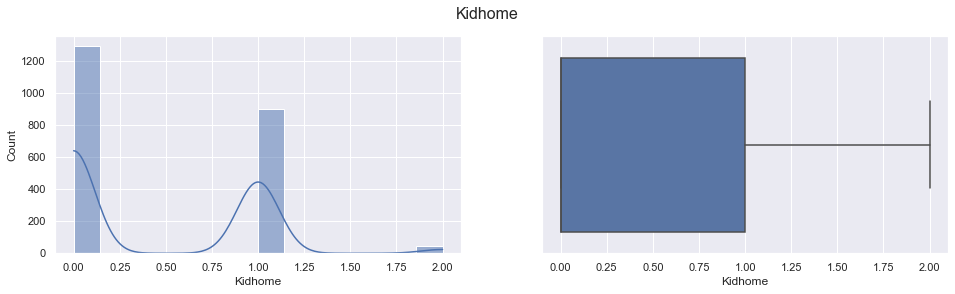

count    2240.000000
mean        0.444196
std         0.538398
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Kidhome, dtype: float64


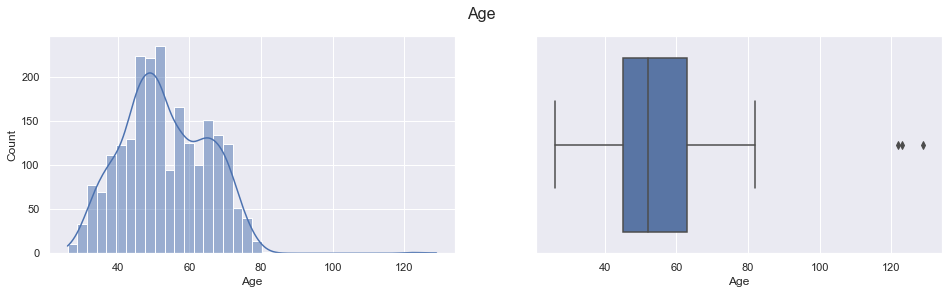

count    2240.000000
mean       53.194196
std        11.984069
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max       129.000000
Name: Age, dtype: float64


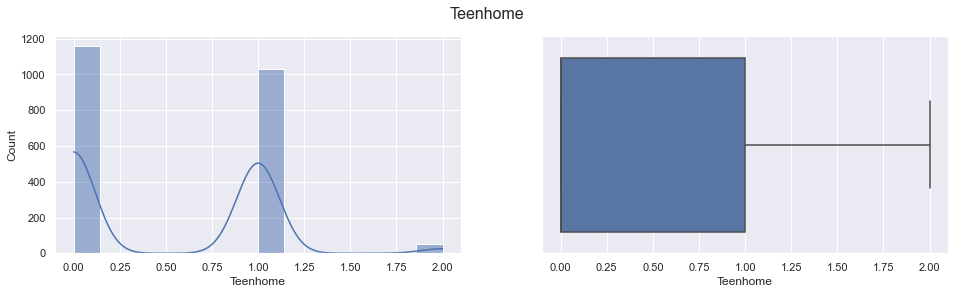

count    2240.000000
mean        0.506250
std         0.544538
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Teenhome, dtype: float64


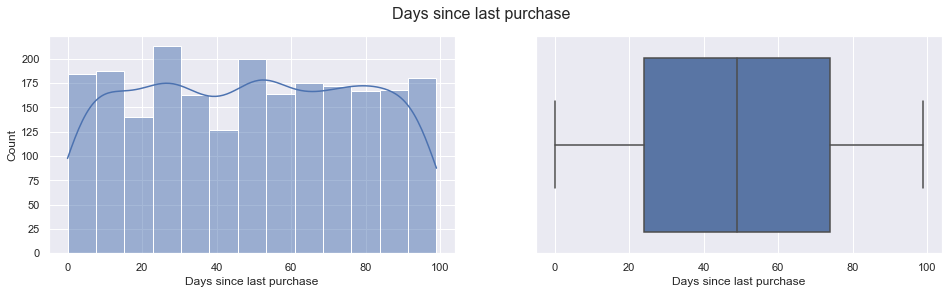

count    2240.000000
mean       49.109375
std        28.962453
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Days since last purchase, dtype: float64


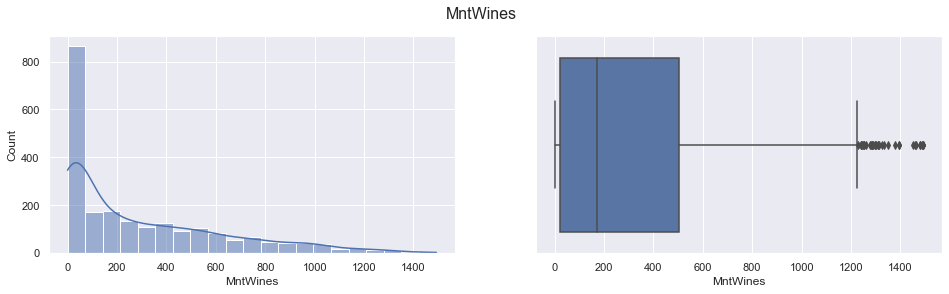

count    2240.000000
mean      303.935714
std       336.597393
min         0.000000
25%        23.750000
50%       173.500000
75%       504.250000
max      1493.000000
Name: MntWines, dtype: float64


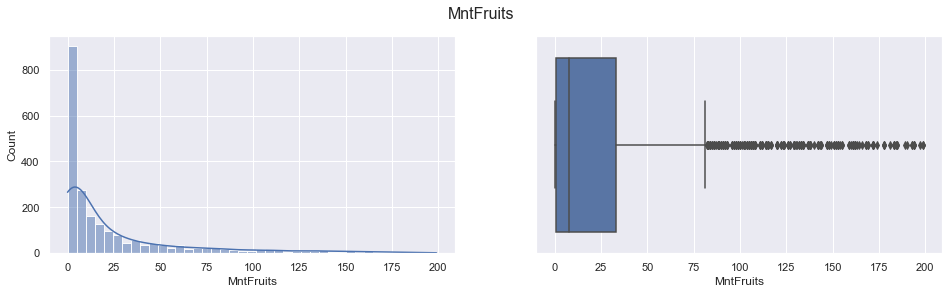

count    2240.000000
mean       26.302232
std        39.773434
min         0.000000
25%         1.000000
50%         8.000000
75%        33.000000
max       199.000000
Name: MntFruits, dtype: float64


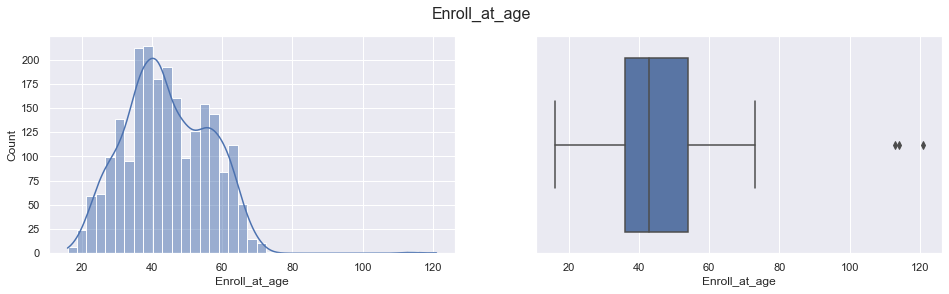

count    2240.000000
mean       44.222321
std        12.022855
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max       121.000000
Name: Enroll_at_age, dtype: float64


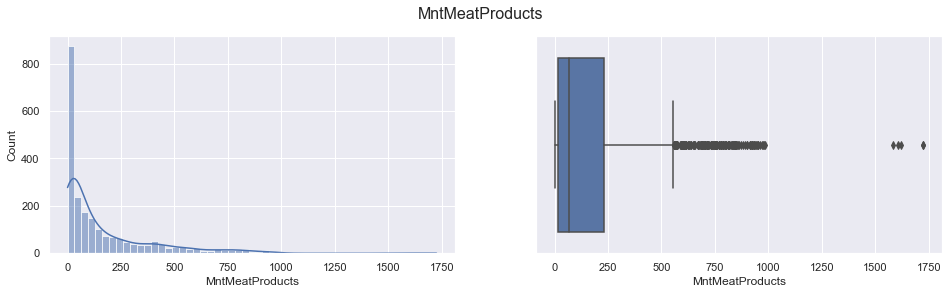

count    2240.000000
mean      166.950000
std       225.715373
min         0.000000
25%        16.000000
50%        67.000000
75%       232.000000
max      1725.000000
Name: MntMeatProducts, dtype: float64


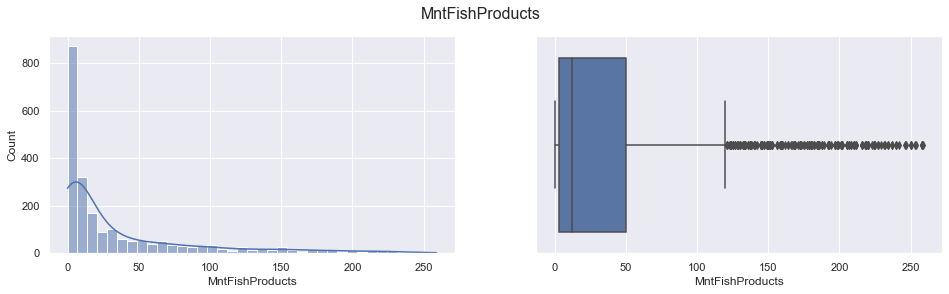

count    2240.000000
mean       37.525446
std        54.628979
min         0.000000
25%         3.000000
50%        12.000000
75%        50.000000
max       259.000000
Name: MntFishProducts, dtype: float64


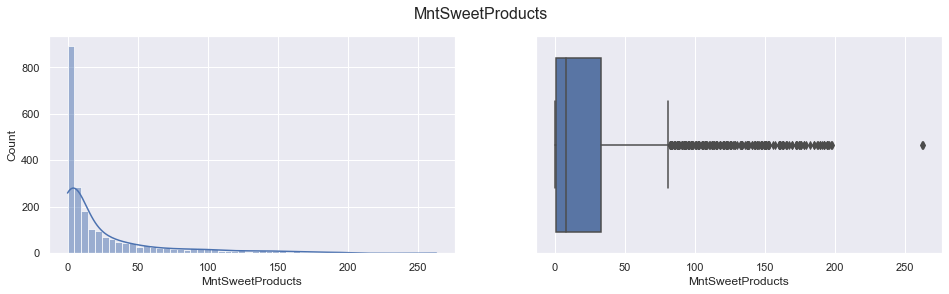

count    2240.000000
mean       27.062946
std        41.280498
min         0.000000
25%         1.000000
50%         8.000000
75%        33.000000
max       263.000000
Name: MntSweetProducts, dtype: float64


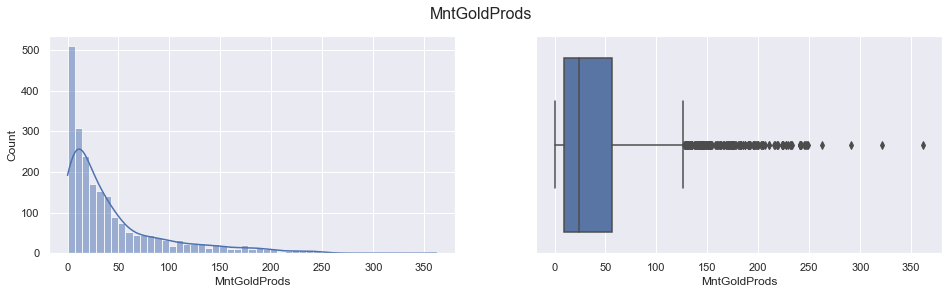

count    2240.000000
mean       44.021875
std        52.167439
min         0.000000
25%         9.000000
50%        24.000000
75%        56.000000
max       362.000000
Name: MntGoldProds, dtype: float64


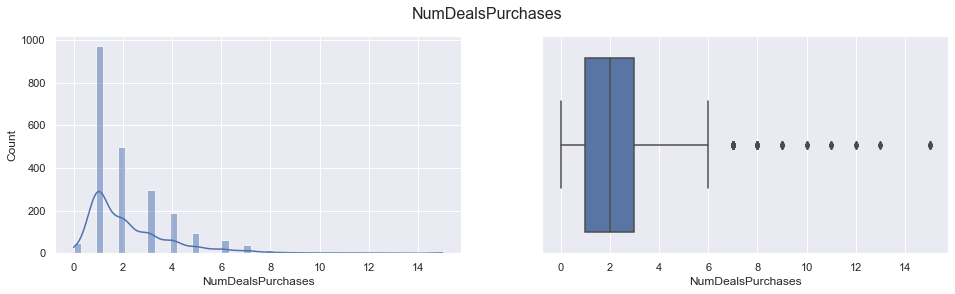

count    2240.000000
mean        2.325000
std         1.932238
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: NumDealsPurchases, dtype: float64


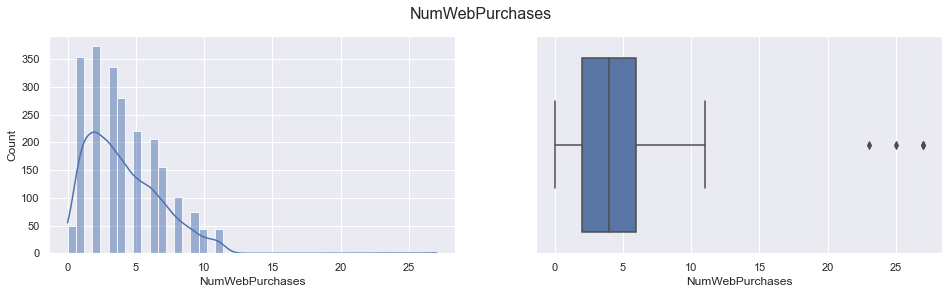

count    2240.000000
mean        4.084821
std         2.778714
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        27.000000
Name: NumWebPurchases, dtype: float64


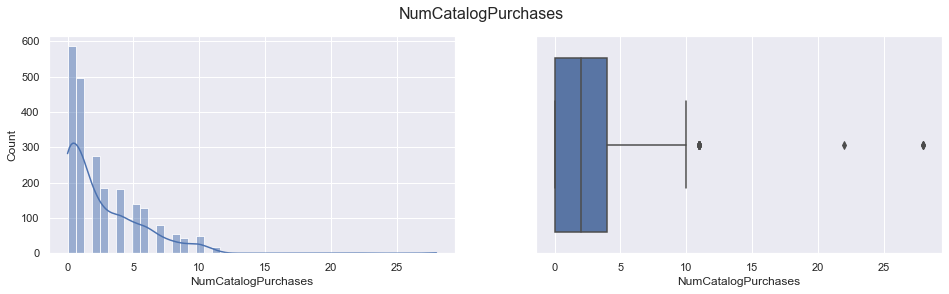

count    2240.000000
mean        2.662054
std         2.923101
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        28.000000
Name: NumCatalogPurchases, dtype: float64


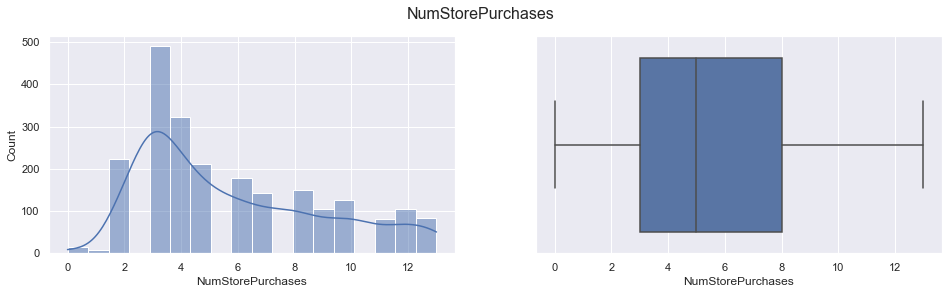

count    2240.000000
mean        5.790179
std         3.250958
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        13.000000
Name: NumStorePurchases, dtype: float64


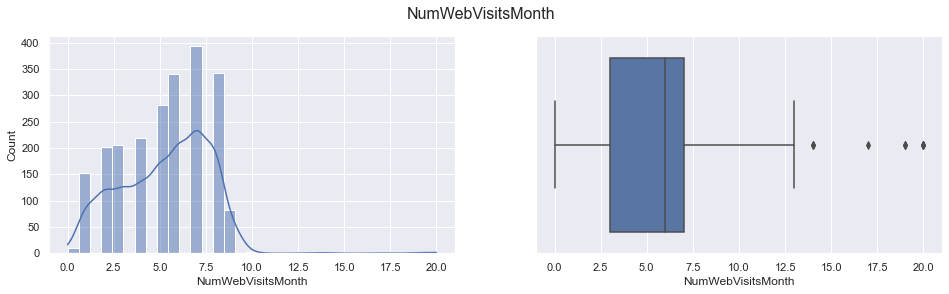

count    2240.000000
mean        5.316518
std         2.426645
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: NumWebVisitsMonth, dtype: float64


In [23]:
for col in numeric.columns:
    if col =="AcceptedCmp3": 
        break
    report(col)
    

In [24]:
numeric.columns

Index(['Kidhome', 'Age', 'Teenhome', 'Days since last purchase', 'MntWines',
       'MntFruits', 'Enroll_at_age', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Year_Birth',
       'Enrollment date'],
      dtype='object')

In [25]:
numeric[numeric["Age"]>120]

,Kidhome,Age,Teenhome,Days since last purchase,MntWines,MntFruits,Enroll_at_age,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Year_Birth,Enrollment date
ID,,,,,,,,,,,,,,,,,,,,,,,,,
11004,0.0,129,1.0,23.0,8.0,0.0,121,5.0,7.0,0.0,2.0,1.0,1.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1893,2014-05-17
1150,0.0,123,0.0,36.0,755.0,144.0,114,562.0,104.0,64.0,224.0,1.0,4.0,6.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1899,2013-09-26
7829,1.0,122,0.0,99.0,15.0,6.0,113,8.0,7.0,4.0,25.0,1.0,2.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1900,2013-09-26


In [26]:
##According to Wikipedia, there're no person alives at that age in 20 century.
##We can conclude that there were some mistakes in these records. So, I'll mark their "Year_Birth", "Age", "Enroll_at_age" Null.

temp=numeric[numeric["Age"]>120].index
numeric.loc[temp,["Age","Enroll_at_age","Year_Birth"]]=np.nan

In [27]:
numeric["Enrollment date"].value_counts()

2012-08-31    12
2012-09-12    11
2014-05-12    11
2013-02-14    11
2013-08-20    10
              ..
2014-04-10     1
2012-09-01     1
2012-12-14     1
2012-08-15     1
2012-10-19     1
Name: Enrollment date, Length: 663, dtype: int64

In [28]:
import datetime as dt
yr=numeric["Enrollment date"].dt.year
yr.value_counts()


2013    1189
2014     557
2012     494
Name: Enrollment date, dtype: int64

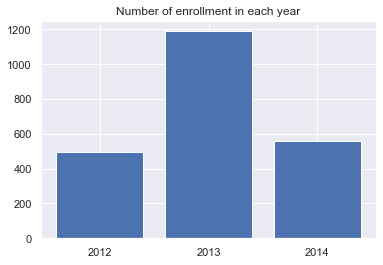

In [29]:
plt.bar(height=numeric["Enrollment date"].dt.year.value_counts()[[2012,2013,2014]], x=["2012","2013","2014"])

plt.title('Number of enrollment in each year')
plt.show()


Text(0.5, 1.0, 'Enrolment over the months')

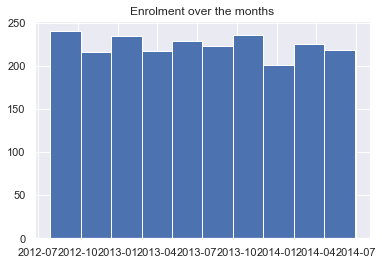

In [30]:
#However in 2012, the data is gathered from 2012/08 and ,in 2014, data is gathered until 2014/07. 
#Thus, that makes sense that 2013 have the greatest number of enrollment.

plt.hist(numeric["Enrollment date"])
plt.title("Enrolment over the months")

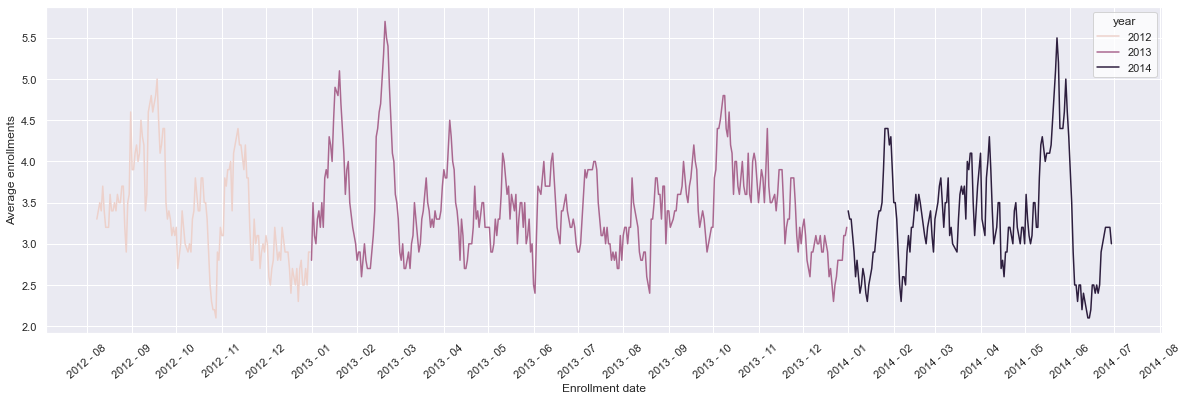

In [31]:
# shows the average number of enrollment over time.
df = pd.pivot_table(numeric, index='Enrollment date', aggfunc='count')
df["count"]=df["Complain"].rolling(10).mean()
df["year"]=df.index.year

fig,ax=plt.subplots()
fig.set_size_inches(20,6)

sns.set(style="whitegrid")
sns.lineplot(data=df, x="Enrollment date", y="count",ax=ax, hue="year")
ax.set_ylabel("Average enrollments")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y - %m'))
plt.xticks(rotation=40)
plt.show()

In [32]:
#removing ',' and ".00" in income
category["Income"]=category["Income"].str.replace(r",","")
category["Income"]=category["Income"].str.split(".", n = 1, expand = True)
category["Income"]=category["Income"].fillna(method="pad")
category["Income"]=category["Income"].astype(int).to_list()

In [33]:
 # This time, we need to exclude the outlier in "Income" column before caculating any statistics

<AxesSubplot:xlabel='Income'>

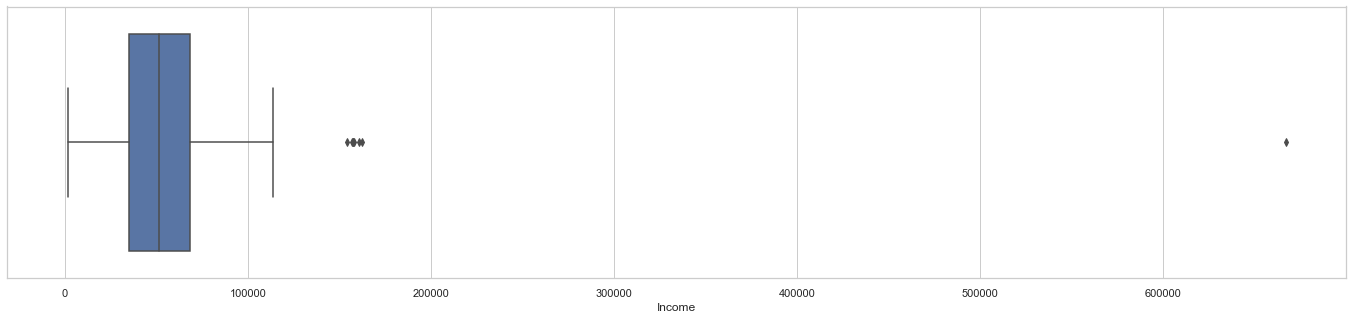

In [34]:
category["Income"].describe()
fig, ax=plt.subplots()
fig.set_size_inches(24,5)
sns.boxplot(x=category["Income"], ax=ax)

In [35]:
category["Income"].quantile([0.25,0.75])

0.25    35191.5
0.75    68522.0
Name: Income, dtype: float64

In [36]:
IQR=category["Income"].quantile(0.75)-category["Income"].quantile(0.25)
max_income=category["Income"].quantile(0.75)+1.5*IQR
max_income

118517.75

In [37]:
numeric_analysis=category[category["Income"]<max_income]

In [38]:
df=pd.pivot_table(numeric_analysis, index="Country",aggfunc={"mean","median"})

In [39]:
df

Income         
                 mean   median
Country                       
AUS      50959.000000  49650.5
CA       52683.550562  52750.0
GER      53085.608333  53217.0
IND      48197.510204  46854.0
ME       57680.333333  52614.0
SA       52699.023881  51717.0
SP       51288.536630  50568.0
US       51872.333333  54497.0

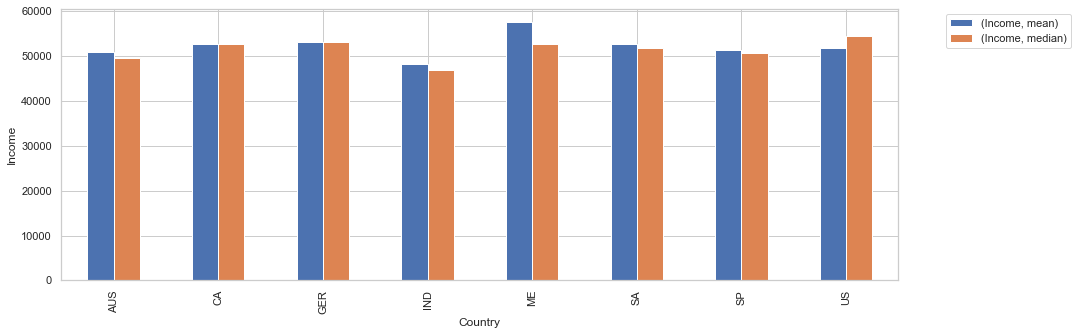

In [40]:
df.plot(kind="bar",figsize=(15,5))
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.ylabel("Income")
plt.show()

In [41]:
temp=numeric_analysis.join(numeric["Age"])
temp

,Education,Marital_Status,Income,Country,Age
ID,,,,,
1826,Graduation,Divorced,84835,SP,52.0
1,Graduation,Single,57091,CA,61.0
10476,Graduation,Married,67267,US,64.0
1386,Graduation,Together,32474,AUS,55.0
5371,Graduation,Single,21474,SP,33.0
...,...,...,...,...,...
10142,PhD,Divorced,66476,US,46.0
5263,2n Cycle,Married,31056,SP,45.0
22,Graduation,Divorced,46310,SP,46.0


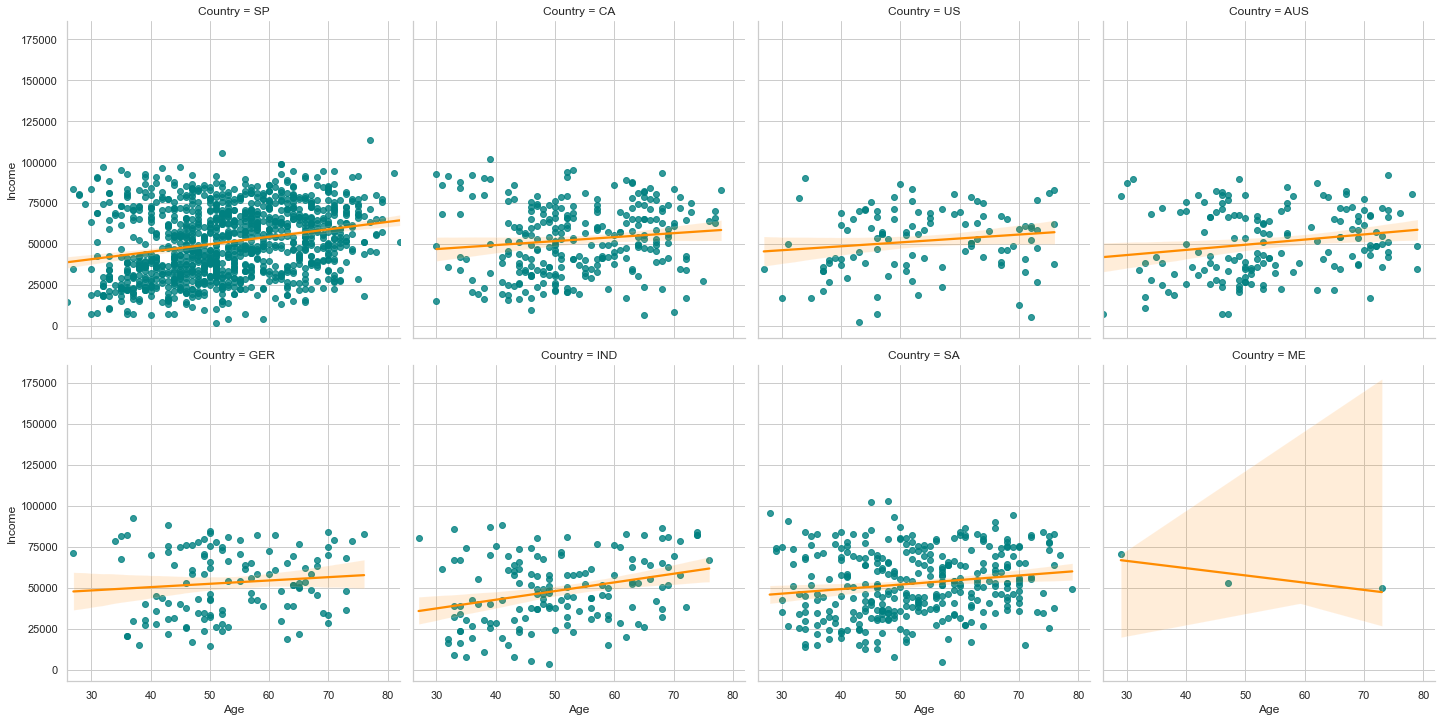

In [42]:
sns.lmplot(data=temp,y="Income",x="Age", col="Country",col_wrap=4, 
          line_kws={"color":"darkorange"}, scatter_kws={"color":"teal"})
plt.show()

In [43]:
# Next, Income in each education level
df=pd.pivot_table(numeric_analysis, index="Education", aggfunc={"Income":["count","mean","median"]})
df

Income                       
             count          mean   median
Education                                
2n Cycle     203.0  47561.197044  46779.0
Basic         54.0  20306.259259  20744.0
Graduation  1124.0  51958.535587  51844.5
Master       369.0  52559.669377  50898.0
PhD          482.0  55112.842324  54978.5

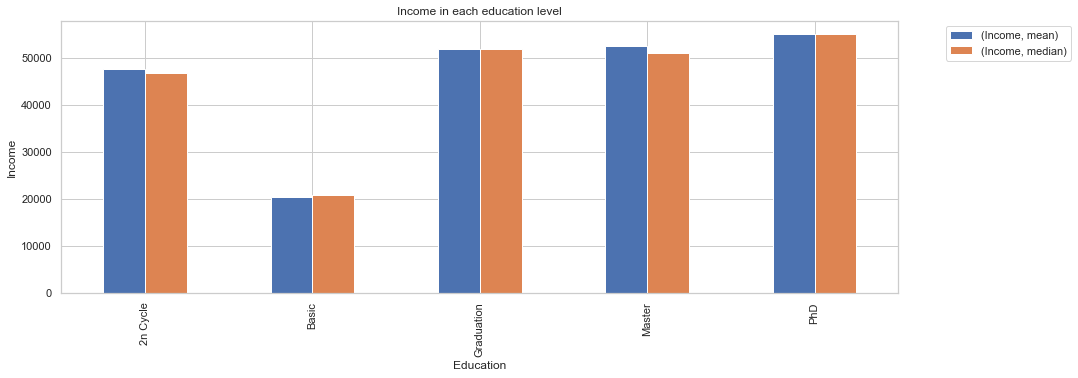

In [44]:
df=pd.pivot_table(numeric_analysis, index="Education",aggfunc={"mean","median"})
df.plot(kind='bar',figsize=(15,5))

plt.ylabel('Income')
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left")
plt.title('Income in each education level')
plt.show()


In [45]:
del numeric_analysis

In [46]:
#"Total products amount" : define a total number of products purchased by each customer.
numeric["Total Products amount"]=np.sum(Products, axis=1)
numeric

,Kidhome,Age,Teenhome,Days since last purchase,MntWines,MntFruits,Enroll_at_age,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Year_Birth,Enrollment date,Total Products amount
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
1826,0.0,52.0,0.0,0.0,189.0,104.0,44.0,379.0,111.0,189.0,218.0,1.0,4.0,4.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1970.0,2014-06-16,1190
1,0.0,61.0,0.0,0.0,464.0,5.0,53.0,64.0,7.0,0.0,37.0,1.0,7.0,3.0,7.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1961.0,2014-06-15,577
10476,0.0,64.0,1.0,0.0,134.0,11.0,56.0,59.0,15.0,2.0,30.0,1.0,3.0,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1958.0,2014-05-13,251
1386,1.0,55.0,1.0,0.0,10.0,0.0,47.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1967.0,2014-05-11,11
5371,1.0,33.0,0.0,0.0,6.0,16.0,25.0,24.0,11.0,0.0,34.0,2.0,3.0,1.0,2.0,7.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1989.0,2014-04-08,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10142,0.0,46.0,1.0,99.0,372.0,18.0,37.0,126.0,47.0,48.0,78.0,2.0,5.0,2.0,11.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1976.0,2013-03-07,689
5263,1.0,45.0,0.0,99.0,5.0,10.0,36.0,13.0,3.0,8.0,16.0,1.0,1.0,0.0,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1977.0,2013-01-22,55
22,1.0,46.0,0.0,99.0,185.0,2.0,36.0,88.0,15.0,5.0,14.0,2.0,6.0,1.0,5.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1976.0,2012-12-03,309


In [47]:
Purchases

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
ID,,,,,
1826,1,4,4,6,1
1,1,7,3,7,5
10476,1,3,2,5,2
1386,1,1,0,2,7
5371,2,3,1,2,7
...,...,...,...,...,...
10142,2,5,2,11,4
5263,1,1,0,3,8
22,2,6,1,5,8


In [48]:
total_purchase_each=pd.DataFrame(Purchases.iloc[:,:-1].sum(), columns=["Total"])
total_purchase_each

,Total
NumDealsPurchases,5208
NumWebPurchases,9150
NumCatalogPurchases,5963
NumStorePurchases,12970


In [49]:
#looking into proportion of the number of purchases in each channel ('Deal', 'Web', 'Catalog', 'Store') 
#to see the performance of each channel.
percent_purchase_each=(total_purchase_each["Total"]/total_purchase_each["Total"].sum())*100
percent_purchase_each

NumDealsPurchases      15.643868
NumWebPurchases        27.484906
NumCatalogPurchases    17.911748
NumStorePurchases      38.959479
Name: Total, dtype: float64

NumDealsPurchases      15.643868
NumCatalogPurchases    17.911748
NumWebPurchases        27.484906
NumStorePurchases      38.959479
Name: Total, dtype: float64


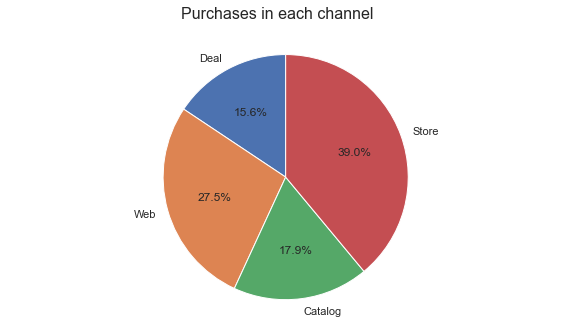

In [50]:
labels=["Deal","Web","Catalog","Store"]
fig, ax=plt.subplots()
fig.suptitle("Purchases in each channel",fontsize=16)
fig.set_size_inches(10,5)
ax.pie(percent_purchase_each,labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis("equal")
print(percent_purchase_each.sort_values())
plt.show()

In [51]:
# looking into total number of purchases in each country.
Purchases_country=Purchases.join(temp["Country"])
Purchase_country_summary=pd.pivot_table(Purchases_country, index="Country",aggfunc="sum")
Purchase_country_summary

,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth
Country,,,,,
AUS,419,362,879,654,827
CA,735,644,1568,1154,1417
GER,332,258,721,477,621
IND,343,350,785,584,814
ME,15,7,19,18,18
SA,888,811,1985,1394,1775
SP,2849,2469,6350,4381,5818
US,303,273,657,484,610


<AxesSubplot:xlabel='Country'>

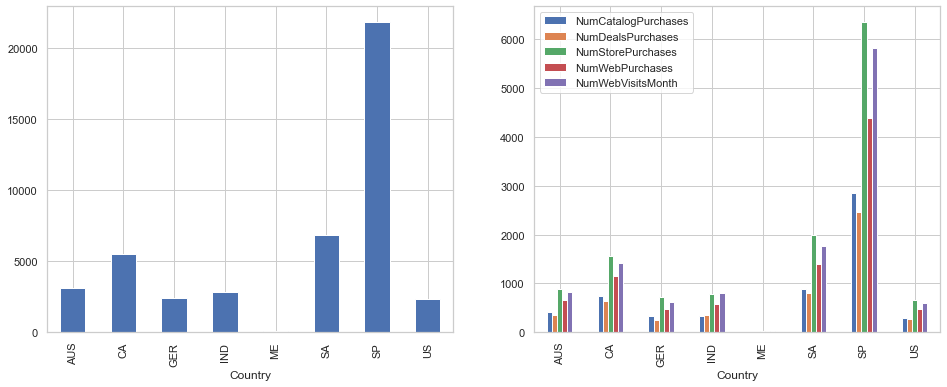

In [52]:
Total=np.sum(Purchase_country_summary, axis=1)
fig, ax=plt.subplots(1,2)
fig.set_size_inches(16,6)
Purchase_country_summary.plot(kind="bar",ax=ax[1])
Total.plot(kind="bar",ax=ax[0])

In [53]:
# which product was the most popular.
sum_each_product=Products.sum()
sum_each_product


MntWines            680816
MntFruits            58917
MntMeatProducts     373968
MntFishProducts      84057
MntSweetProducts     60621
MntGoldProds         98609
dtype: int64

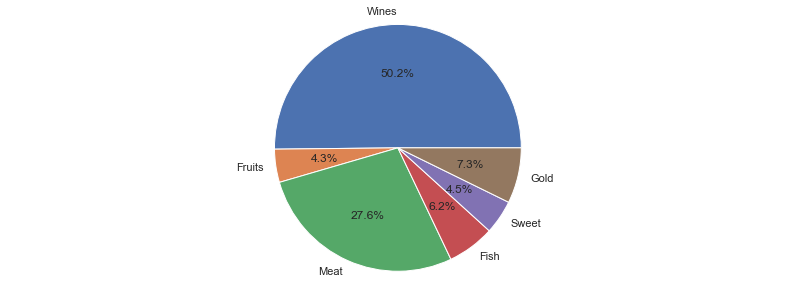

In [54]:
labels=["Wines","Fruits","Meat","Fish","Sweet","Gold"]
plt.figure(figsize=(14,5))
plt.pie(sum_each_product, labels=labels, autopct="%1.1f%%")
plt.axis("equal")
plt.show()

In [55]:
Campaigns

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
ID,,,,,
1826,0,0,0,0,0
1,0,0,0,0,1
10476,0,0,0,0,0
1386,0,0,0,0,0
5371,1,0,0,0,0
...,...,...,...,...,...
10142,0,0,0,0,0
5263,0,0,0,0,0
22,0,0,0,0,0


In [56]:
each_campaign=np.sum(Campaigns, axis=0)
CR_each_campaign=(each_campaign/len(Campaigns))*100
CR_each_campaign

AcceptedCmp3    7.276786
AcceptedCmp4    7.455357
AcceptedCmp5    7.276786
AcceptedCmp1    6.428571
AcceptedCmp2    1.339286
dtype: float64

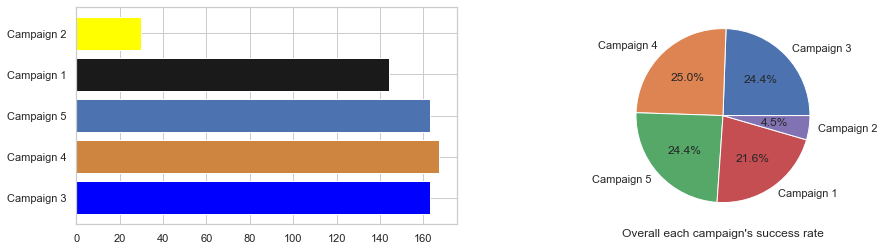

In [57]:
fig, ax=plt.subplots(1,2)
fig.set_size_inches(15,4)

ax[0].barh(y=['Campaign 3','Campaign 4','Campaign 5','Campaign 1','Campaign 2'], width=each_campaign, 
           color=['blue','peru','b','k','yellow'])

ax[1].pie(CR_each_campaign, labels=['Campaign 3','Campaign 4','Campaign 5','Campaign 1','Campaign 2'], autopct="%1.1f%%")
ax[1].set_xlabel("Overall each campaign's success rate")
plt.show()

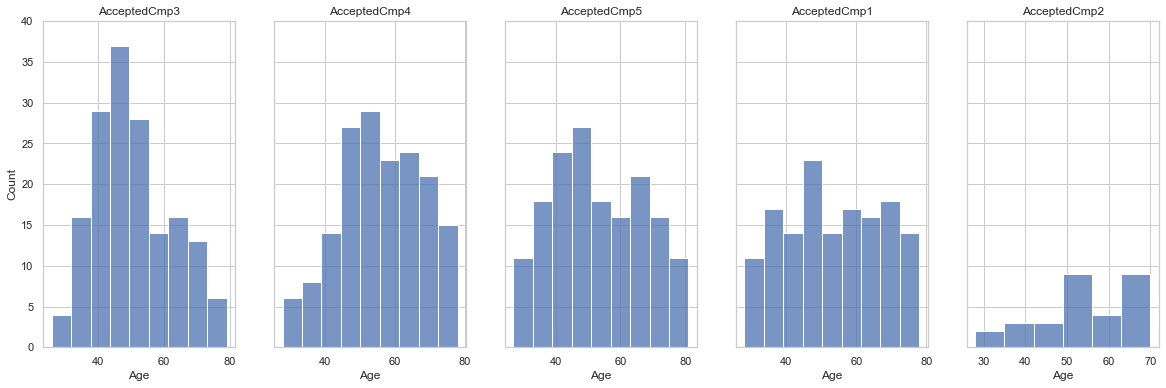

In [58]:
#We want to know if 'Age' have some noticeable effect on campaign acceptance.
#Although there's no obvious trend, we still can see that campaign3 is likely to be accepted in younger customers than campaign4

fig, ax=plt.subplots(1,len(Campaigns.columns), sharey=True)
j=0
fig.set_size_inches(20,6)

for i in Campaigns.columns:
    sns.histplot(data=numeric[numeric[i]==1], x="Age",ax=ax[j])
    ax[j].set_ylim(0,40)
    ax[j].set_title(i)
    
    j+=1

In [59]:
# if there's that effect in different countries, overall conversion rate in each country.
Campaigns_category = Campaigns.join(category)
Campaigns_category["Total accept"]=np.sum(Campaigns,axis=1)
summary_country=pd.pivot_table(Campaigns_category,index="Country",values="Total accept",aggfunc={"Total accept":["count","sum"]})
summary_country["COnversion rate"]=summary_country["sum"]/summary_country["count"]
summary_country.rename(columns={"count":"customer","sum":"Total accept"}).style.background_gradient(sns.light_palette('khaki', as_cmap=True))


,customer,Total accept,COnversion rate
Country,,,
AUS,160,35,0.218750
CA,268,87,0.324627
GER,120,38,0.316667
IND,148,39,0.263514
ME,3,1,0.333333
SA,337,86,0.255193
SP,1095,355,0.324201
US,109,26,0.238532


In [60]:
# the average performance of each campaign in each country.
#Keep in mind that \"ME\" has only 3 observations.
temp=Campaigns_category.groupby("Country").mean()
temp.drop(["ME"],axis=0,inplace=True)## since "ME" have only 3 observations

In [61]:
temp.style.background_gradient(sns.light_palette("green",as_cmap=True))

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Income,Total accept
Country,,,,,,,
AUS,0.056250,0.037500,0.081250,0.043750,0.000000,50959.000000,0.218750
CA,0.067164,0.089552,0.078358,0.067164,0.022388,53072.507463,0.324627
GER,0.083333,0.091667,0.066667,0.058333,0.016667,53085.608333,0.316667
IND,0.087838,0.074324,0.040541,0.047297,0.013514,48934.304054,0.263514
SA,0.062315,0.059347,0.062315,0.059347,0.011869,54830.816024,0.255193
SP,0.075799,0.081279,0.081279,0.071233,0.014612,51580.946119,0.324201
US,0.073394,0.055046,0.045872,0.064220,0.000000,52871.697248,0.238532


# Statistical Analysis

What factors are significantly related to the number of store purchases?
this question is tackled by trying some feature selection methods including L1-Regularization, ANOVA F-test, Recursive feature elimination.

First, We'll see the linear effect of numerical variables on "number of store purchases" by using statistical models such as regression and F-test.
But before that we need to immpute the missing values.

I'll impute these null values by KNN imputation. KNN imputation is an approach to fill the missing data by using a model to predict the missing values. A range of different models can be used, although a simple k-nearest neighbor (KNN) model has proven to be effective in experiments. The use of a KNN model to predict or fill missing values is referred to as “Nearest Neighbor Imputation” or “KNN imputation.”


In [62]:
X_numeric=data.drop(['NumStorePurchases','Enrollment date','Year_Birth',
                     "Education","Marital_Status","Country"], axis=1).copy()
X_numeric

,Income,Kidhome,Teenhome,Days since last purchase,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
ID,,,,,,,,,,,,,,,,,,,,,
1826,84835,0,0,0,189,104,379,111,189,218,1,4,4,1,0,0,0,0,0,1,0
1,57091,0,0,0,464,5,64,7,0,37,1,7,3,5,0,0,0,0,1,1,0
10476,67267,0,1,0,134,11,59,15,2,30,1,3,2,2,0,0,0,0,0,0,0
1386,32474,1,1,0,10,0,1,0,0,0,1,1,0,7,0,0,0,0,0,0,0
5371,21474,1,0,0,6,16,24,11,0,34,2,3,1,7,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10142,66476,0,1,99,372,18,126,47,48,78,2,5,2,4,0,0,0,0,0,0,0
5263,31056,1,0,99,5,10,13,3,8,16,1,1,0,8,0,0,0,0,0,0,0
22,46310,1,0,99,185,2,88,15,5,14,2,6,1,8,0,0,0,0,0,0,0


In [63]:
y=data[["NumStorePurchases"]]
y

,NumStorePurchases
ID,
1826,6
1,7
10476,5
1386,2
5371,2
...,...
10142,11
5263,3
22,5


In [64]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.pipeline import FeatureUnion, Pipeline


In [65]:
#What factors are significantly related to the number of store purchases?
#I'll figure out this question by trying some feature selection methods including L1-Regularization, ANOVA F-test

# 1) Preoprocess
Imputer=KNNImputer(missing_values=np.nan)
Scaler=StandardScaler()

In [66]:
numeric_pipe=Pipeline([("Impute",Imputer),("Scale",Scaler)])
X_numeric_preprocessed=numeric_pipe.fit_transform(X_numeric)

In [67]:

## 2) Building the models
parameters={"alpha":[1e-15,1e-10,1e-7,1e-4,1e-2,0.1,1,2,10,20,30,40,50,60,70,80,90,100,110,150,200]}
ridge=Ridge()
ridge_regression=GridSearchCV(ridge,parameters,scoring="neg_mean_squared_error", cv=5)#runs all the values from parameter and choose the best ridge model 
ridge_regression.fit(X_numeric_preprocessed,y)
print(ridge_regression.best_params_)
print(ridge_regression.best_score_)

{'alpha': 150}
-4.655754173148122


In [68]:
ridge=Ridge(alpha=150).fit(X_numeric_preprocessed,y)
ridge.coef_

array([[ 0.21854847, -0.40013233,  0.01939857, -0.07501753,  1.13470451,
         0.32425152,  0.00983615,  0.23920337,  0.20752515,  0.05962985,
         0.4272933 ,  0.47171928, -0.10600773, -0.57585138, -0.16443377,
         0.0341645 , -0.17830131, -0.07618706,  0.08824986, -0.2591057 ,
         0.04021411]])

In [69]:
lasso=Lasso()
parameters={"alpha":[1e-15,1e-10,1e-7,1e-4,1e-2,0.1,1,2,10,20,30,40,50,60,70,80,90,100,110,150,200]}
lasso_regression=GridSearchCV(lasso, parameters,scoring="neg_mean_squared_error", cv=5)#runs all the values from parameter and choose the best ridge model
lasso_regression.fit(X_numeric_preprocessed,y)
print("Lasso best alpha ",lasso_regression.best_params_)
print("Lasso best score ",lasso_regression.best_score_)

Lasso best alpha  {'alpha': 0.01}
Lasso best score  -4.667592190762652


In [70]:
lasso=Lasso(alpha=0.01).fit(X_numeric_preprocessed, y)
lasso.coef_

array([ 0.16837957, -0.39842471, -0.        , -0.07128317,  1.30761851,
        0.3320449 , -0.00281449,  0.2338903 ,  0.20093999,  0.02969979,
        0.47014627,  0.46499261, -0.18411225, -0.65760111, -0.15816278,
        0.        , -0.21551796, -0.07072987,  0.08147343, -0.26309806,
        0.03539663])

In [71]:
from sklearn.feature_selection import f_regression
F,p=f_regression(X_numeric_preprocessed,y) # Statistically check how each predictor & target are linearly correlated
F
p

array([8.65244420e-162, 8.44926824e-142, 1.64156800e-002, 9.69857747e-001,
       1.28858005e-260, 1.05038104e-118, 3.03889516e-129, 1.27498129e-117,
       1.95744795e-111, 1.34472570e-078, 1.10630746e-003, 8.96280240e-144,
       1.49827468e-154, 1.04798714e-100, 1.37323309e-003, 1.18359462e-017,
       8.64919737e-025, 2.28620013e-018, 5.41415070e-005, 6.25044593e-002,
       4.34399067e-001])

In [72]:
#The table below shows a summary of the models we have built. LASSO's coefficient and F-value can tell the importance of each variable.
#I also included the variance of each variable to see the spread of value in each variable.
columns = [
    ['Features','Variance','Lasso','Ridge','F-test','F-test'],
    ['','','Coef','Coef','F-value','p-value']
]

StorePurchases_effect_num=pd.DataFrame(list(zip(X_numeric.columns,X_numeric.var(),ridge.coef_[0],lasso.coef_,F,p)), columns=columns).set_index("Features")
StorePurchases_effect_num.sort_values(by=("F-test","p-value")).style.background_gradient(sns.light_palette("green", as_cmap=True))



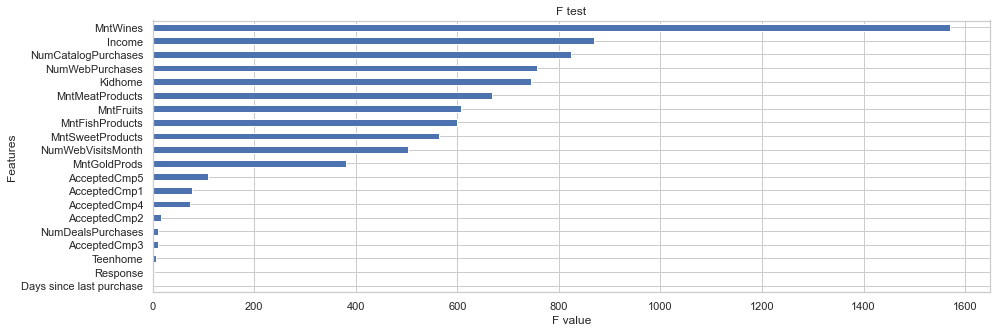

In [73]:
plt.figure(figsize=(15,5))
StorePurchases_effect_num["F-test"]["F-value"].sort_values().plot(kind="barh")
plt.xlabel("F value")
plt.title("F test")
plt.show()

Text(0.5, 1.0, 'Lasso analysis')

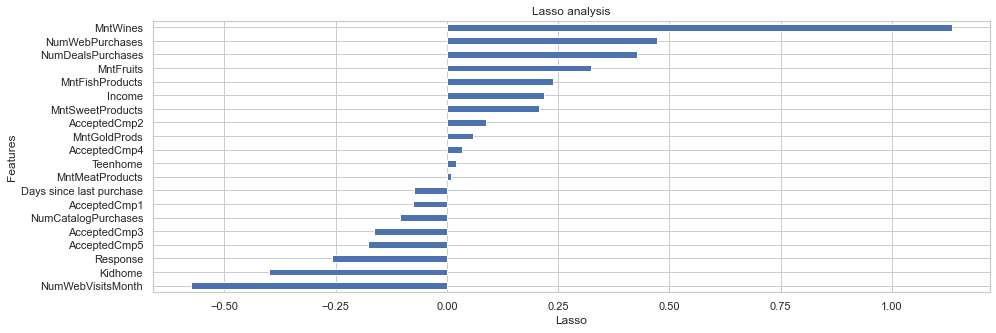

In [74]:
plt.figure(figsize=(15,5))
StorePurchases_effect_num["Lasso"]["Coef"].sort_values().plot(kind="barh")
plt.xlabel("Lasso")
plt.title("Lasso analysis")

<AxesSubplot:xlabel='MntWines', ylabel='NumStorePurchases'>

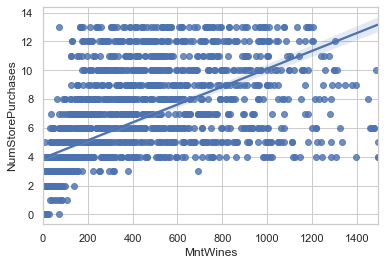

In [75]:
sns.regplot(data["MntWines"], data["NumStorePurchases"])

In [76]:
from sklearn.feature_selection import RFE



In [77]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rfe=RFE(estimator=rf, n_features_to_select=1, verbose=1).fit(X_numeric_preprocessed, y)

Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


In [78]:
pd.Series(dict(zip(X_numeric.columns, rfe.ranking_)), name='Rank').to_frame().sort_values(by='Rank')

,Rank
MntWines,1
MntMeatProducts,2
Income,3
MntFruits,4
MntGoldProds,5
MntSweetProducts,6
MntFishProducts,7
Days since last purchase,8
NumCatalogPurchases,9
NumWebVisitsMonth,10


In [79]:
pd.Series(dict(zip(X_numeric.columns, rfe.ranking_)), name="Rank").to_frame().sort_values(by="Rank")

,Rank
MntWines,1
MntMeatProducts,2
Income,3
MntFruits,4
MntGoldProds,5
MntSweetProducts,6
MntFishProducts,7
Days since last purchase,8
NumCatalogPurchases,9
NumWebVisitsMonth,10


>We can conclude from many methods we performed before that 'MntWines' is the most significant factor related to the number of store purchases.

In [80]:
category_Numstore=numeric[["NumStorePurchases"]].join(category)
category_Numstore.head()

,NumStorePurchases,Education,Marital_Status,Income,Country
ID,,,,,
1826,6.0,Graduation,Divorced,84835,SP
1,7.0,Graduation,Single,57091,CA
10476,5.0,Graduation,Married,67267,US
1386,2.0,Graduation,Together,32474,AUS
5371,2.0,Graduation,Single,21474,SP


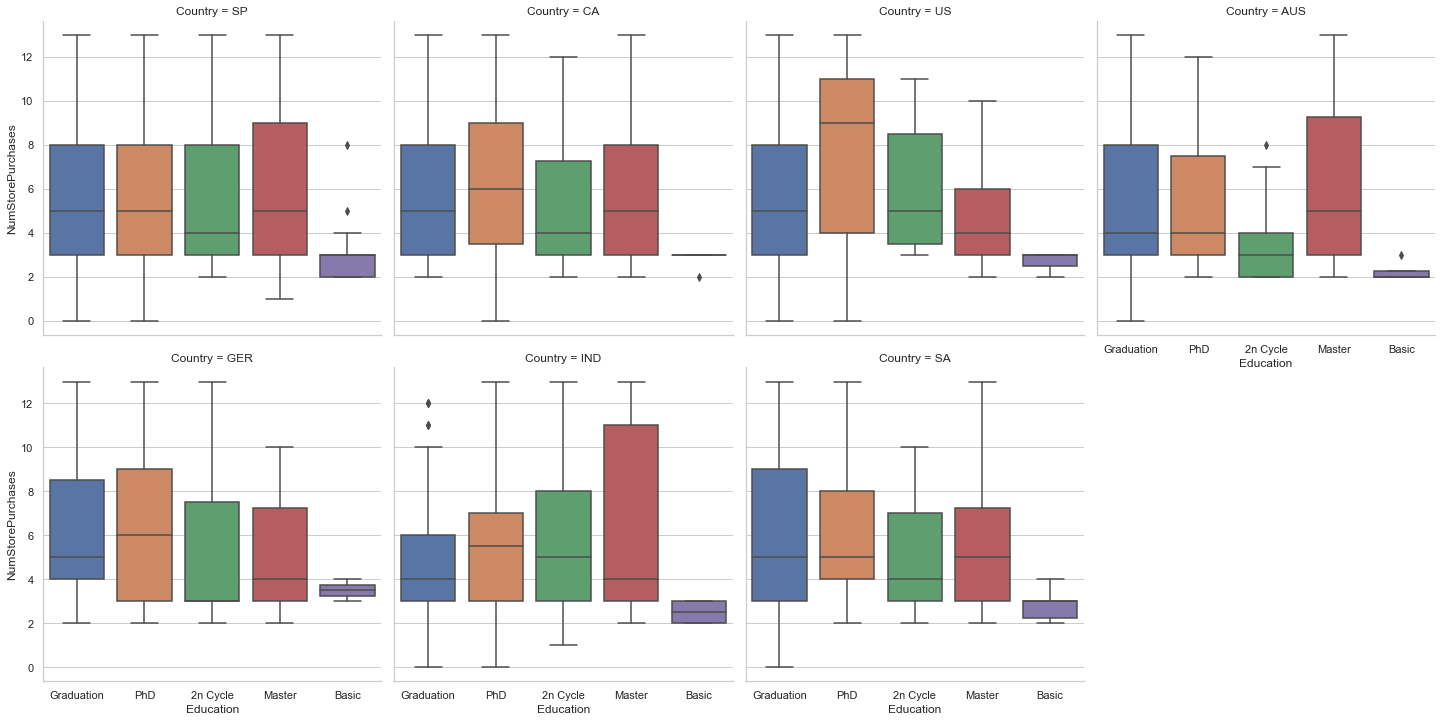

In [81]:
sns.catplot(kind="box",data=category_Numstore[category_Numstore["Country"]!="ME"], x="Education",y="NumStorePurchases",
            col="Country",col_wrap=4)

>we can see that 'Basic' education level seems to have the lowest number of store purchases in all countries.

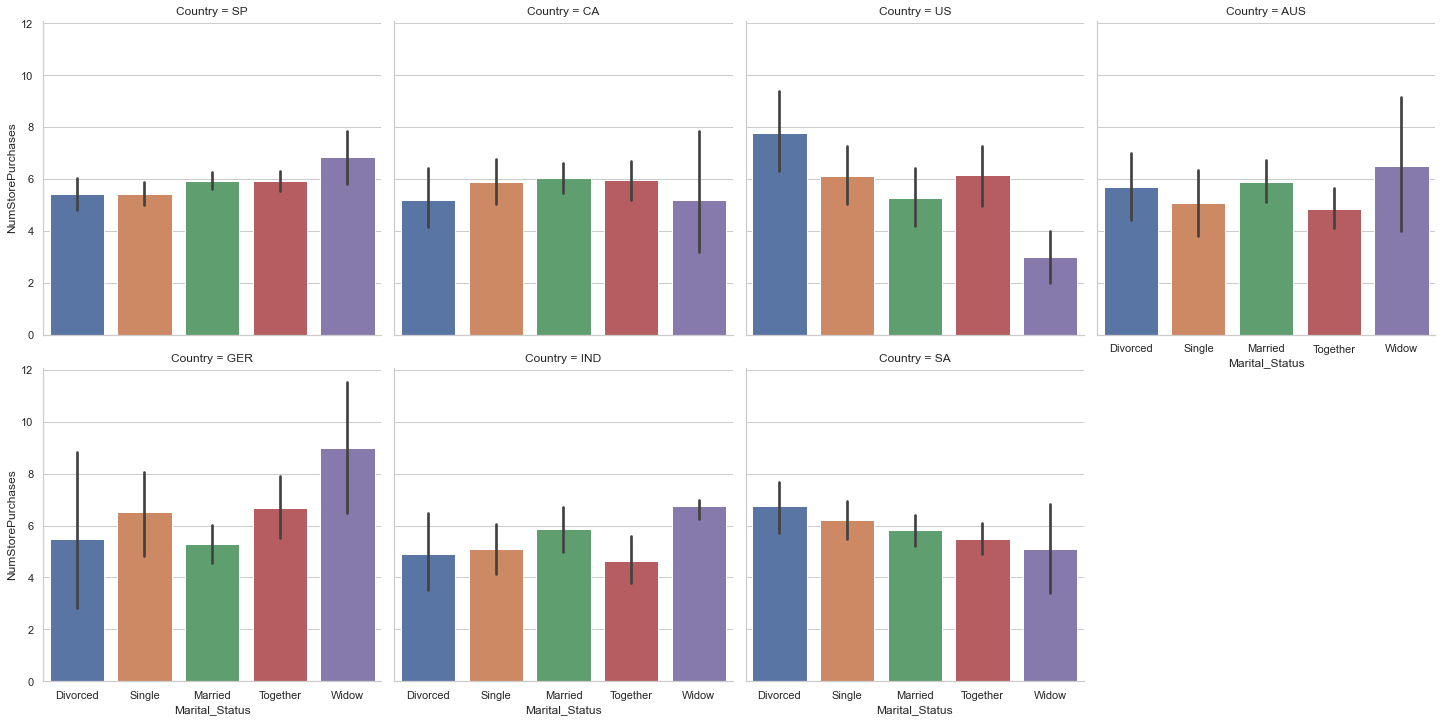

In [82]:
sns.catplot(kind="bar", data=category_Numstore.query("(Country!='ME') and (Marital_Status not in ['YOLO','Alone','Absurd'])"),
            col="Country", x="Marital_Status", y="NumStorePurchases", col_wrap=4)



>there is no obvious trend in marital status in each country as shown in the plot below. However, from the plot below, we might conclude that widows in the US are less likely to purchase in-store w

#Does US fare significantly better than the Rest of the World in terms of total purchases?

#test whether mean of total purchases in US is significantly higher than other country by stating null-hypothesis and  alternative hypothesis under the significance level of 0.05 as following.

In each country :  C 

H0:μus≤μc

Ha:μus>μc   ,α=0.05

Let's see the distribution of purchases in each country and then
a table that summary important statistics of purchases in each country.

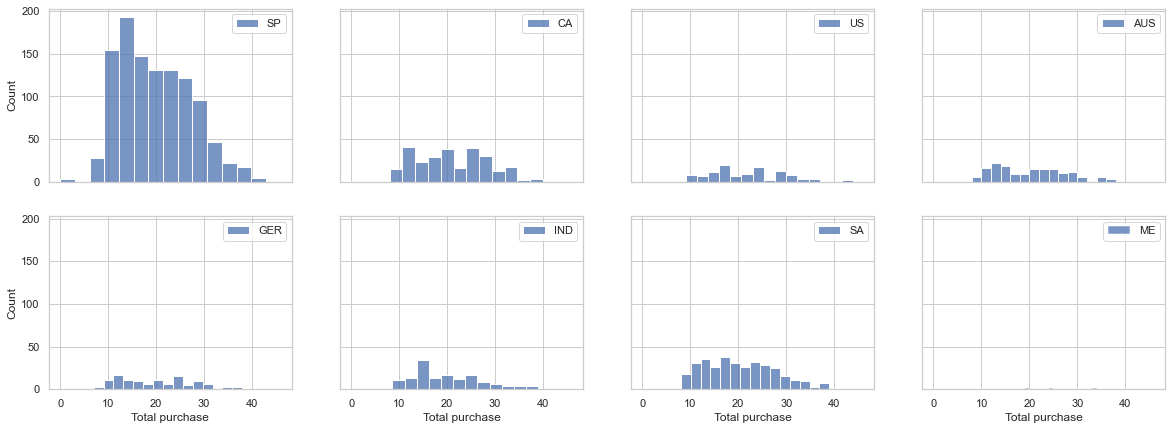

In [92]:
temp=Purchases.join(data[["Country"]])
temp["Total purchase"]=temp.iloc[:,:-1].sum(axis=1)

fig, ax = plt.subplots(2,4,sharex=True,sharey=True)
fig.set_size_inches(20,7)
i=0

import itertools 
axes = list(itertools.chain(ax[0],ax[1]))

for c in temp.Country.unique():
    sns.histplot(data=temp[temp['Country'] == c], x='Total purchase', label=c, ax=axes[i], bins=15)
    axes[i].legend()
    i+=1
plt.show()


In [84]:
summary_purchase_country=temp.groupby("Country").agg(["count","sum","mean","median","std"])
summary_purchase_country["Total purchase"]

,count,sum,mean,median,std
Country,,,,,
AUS,160,3141,19.631250,20,7.151217
CA,268,5518,20.589552,20,7.429784
GER,120,2409,20.075000,20,7.467760
IND,148,2913,19.682432,18,7.352206
ME,3,77,25.666667,24,7.637626
SA,337,6899,20.471810,20,7.049988
SP,1095,21872,19.974429,19,7.281320
US,109,2371,21.752294,21,7.613531


In [85]:
from scipy.stats import norm

us_mean=summary_purchase_country.loc["US",("Total purchase","mean")]
us_std=summary_purchase_country["Total purchase"].loc["US","std"]
us_n=summary_purchase_country["Total purchase"].loc["US", "count"]

for country in summary_purchase_country.index:
    if (country=="US") or (country=="ME"): continue
    other_mean=summary_purchase_country.loc[country,("Total purchase","mean")]
    
    z=(us_mean-other_mean)/(us_std/np.sqrt(us_n))
    
    print("Mean US > Mean "+ country +" p-value = "+str(norm.sf(z)))
        
    


Mean US > Mean AUS p-value = 0.001815537848326719
Mean US > Mean CA p-value = 0.055417908161260694
Mean US > Mean GER p-value = 0.010722851660792366
Mean US > Mean IND p-value = 0.0022672597368808955
Mean US > Mean SA p-value = 0.03955227838776489
Mean US > Mean SP p-value = 0.007385297396392279


>still can not conclude that US has significantly better than the Rest of the World in term of total purchase
since p-value of  μus>μca  is 0.0554 which is not less than 0.05.

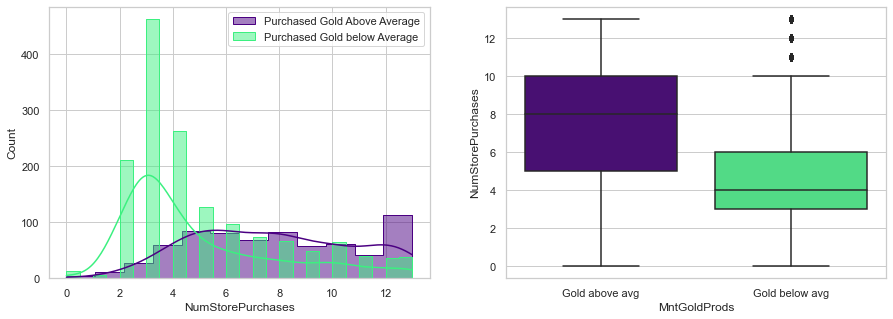

In [86]:
Gold_avg=np.mean(Products["MntGoldProds"])
mask=Products["MntGoldProds"]>=Gold_avg

Above_gold=Products[mask].index
Below_gold=Products[~mask].index

fig,ax= plt.subplots(1,2)
fig.set_size_inches(15,5)

sns.histplot(data=Purchases[mask], x="NumStorePurchases",ax=ax[0], kde=True, label="Purchased Gold Above Average",
             color="indigo", element="step",)
sns.histplot(data=Purchases[~mask], x="NumStorePurchases", ax=ax[0],kde=True, label="Purchased Gold below Average",
            color="#3CF080", element="step")

temp=Purchases.join(mask)
temp["MntGoldProds"]=temp["MntGoldProds"].replace({True:"Gold above avg", False:"Gold below avg"})

sns.boxplot(data=temp,y="NumStorePurchases", x="MntGoldProds",palette={"Gold above avg":"indigo",
                                                                       "Gold below avg":"#3CF080"})


ax[0].legend()

1.Do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish?

In [101]:
numeric.drop(['Year_Birth','Enrollment date',"Total Products amount"], axis=1).copy().corr()[["MntFishProducts"]].style.background_gradient(sns.light_palette("green",as_cmap=True))




,MntFishProducts
Kidhome,-0.387644
Age,0.042519
Teenhome,-0.204187
Days since last purchase,0.001079
MntWines,0.399753
MntFruits,0.594804
Enroll_at_age,0.038459
MntMeatProducts,0.568402
MntFishProducts,1.000000
MntSweetProducts,0.579870


Text(0.5, 1.08, 'Relationship between each categorical variable\nand amount spent on Fish')

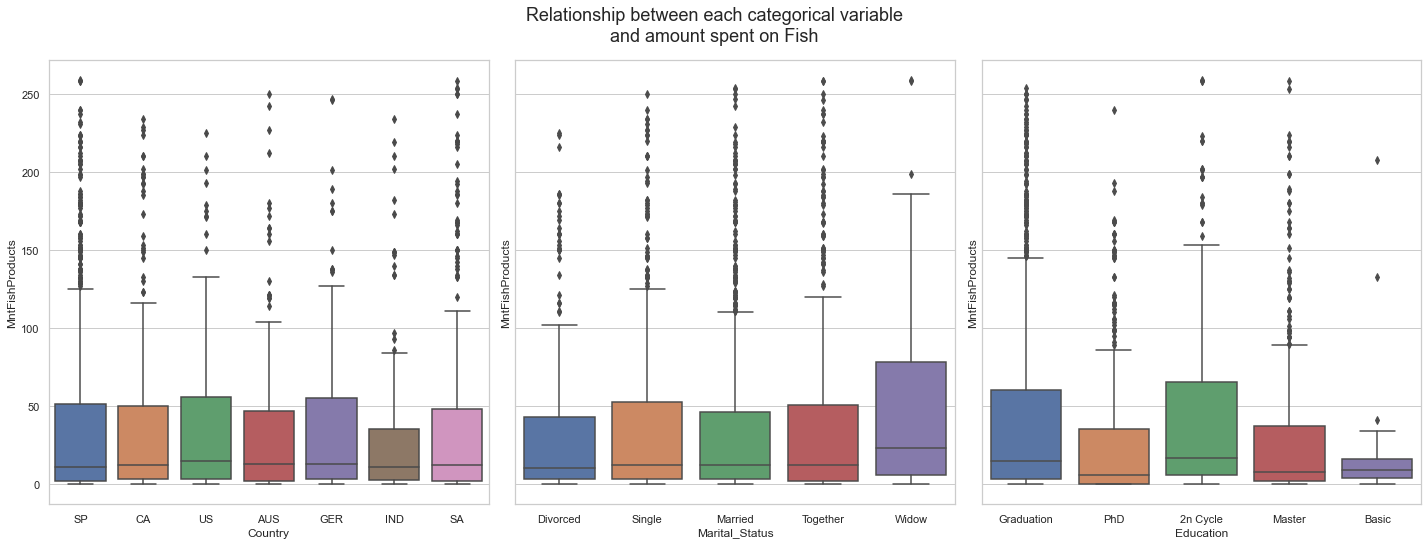

In [137]:
fig, ax=plt.subplots(1,3, sharey=True)
fig.set_size_inches(20,7)

sns.boxplot(data=data[data["Country"]!="ME"], x="Country", y="MntFishProducts", ax=ax[0])

sns.boxplot(data=data.query('Marital_Status not in["YOLO","Alone","Absurd"]'), x="Marital_Status",y="MntFishProducts",ax=ax[1])
#sns.boxplot(data=data[~data["Marital_Status"].isin(["YOLO","Alone","Absurd"])], x="Marital_Status",y="MntFishProducts",ax=ax[1])

sns.boxplot(data=data, x="Education", y="MntFishProducts", ax=ax[2])

fig.tight_layout()
fig.suptitle("Relationship between each categorical variable\nand amount spent on Fish", fontsize=18,y=1.08)



>In 'Country' variable, we see no difference in each country on 'MntFishProducts'.
In 'Marital_Status' variable, Widow tends to have more 'MntFishProducts'.
In 'Education' variable, 'Graduation' and '2n Cycle' tends to have more 'MntFishProducts'.

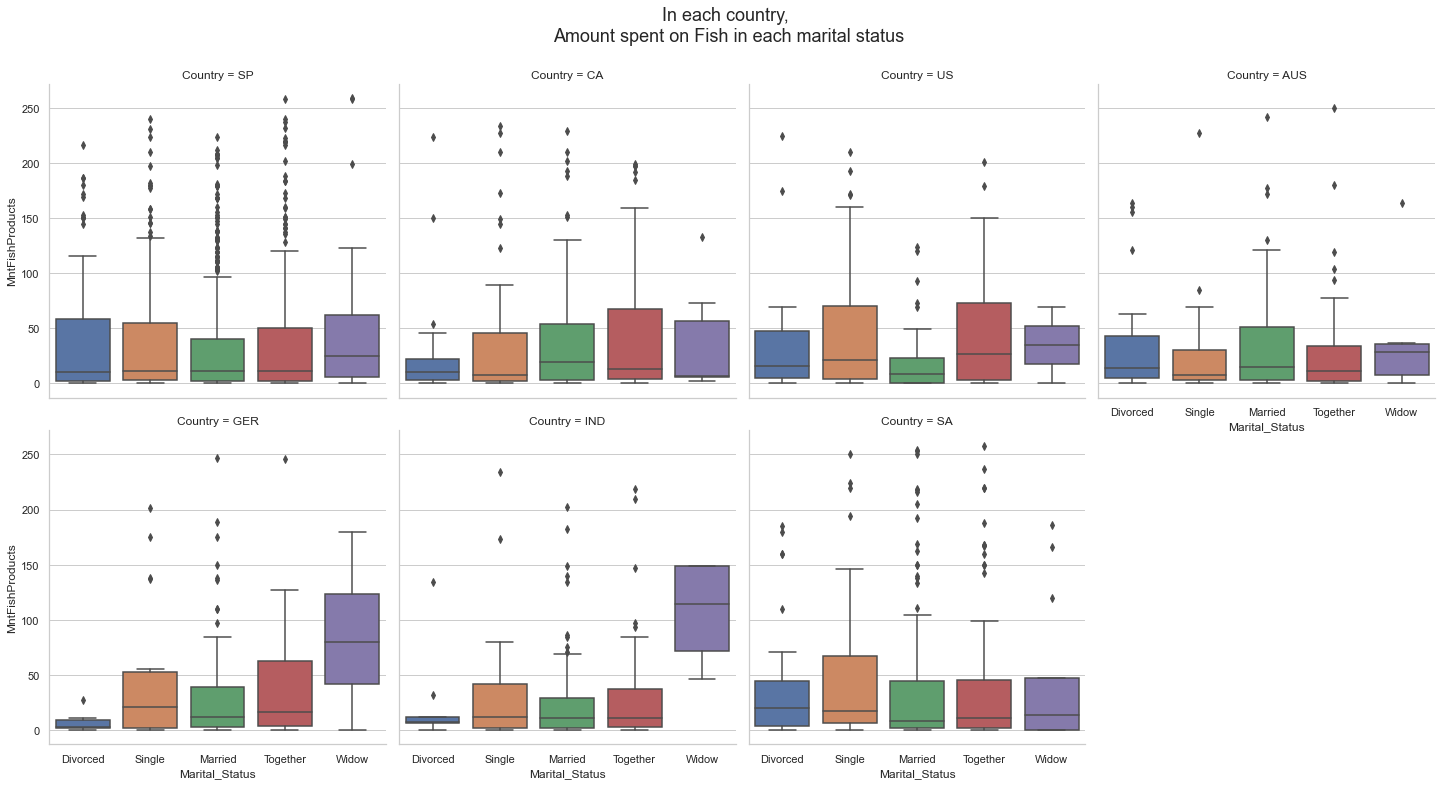

In [142]:
sns.catplot(kind='box', data = data.query('(Marital_Status not in ["YOLO","Absurd","Alone"]) and (Country != "ME")'), 
            x ='Marital_Status', 
            y ='MntFishProducts', 
            col='Country', col_wrap=4)
plt.suptitle('In each country, \nAmount spent on Fish in each marital status', fontsize=18, y=1.07)

plt.show()

>Widows from "GER" and "IND" tend to spend on fish significantly more than others. While the Divorced from those country have a opposite trend.

Text(0.5, 1.08, 'In each country, \nAmount spent on Fish in each education level')

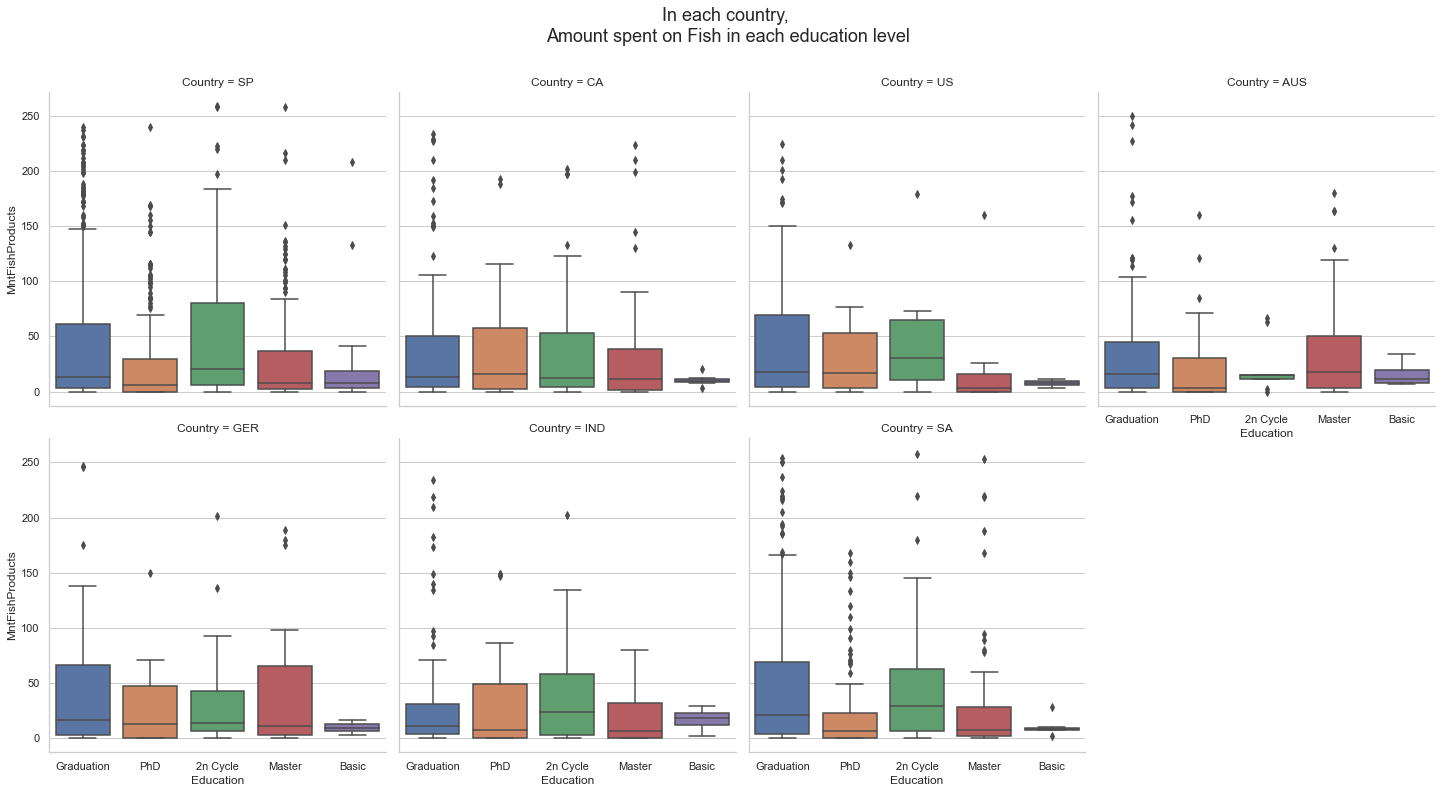

In [156]:
sns.catplot(kind="box", data=data.query('(Marital_Status not in ["YOLO","Absurd","Alone"]) and (Country != "ME")'),
            y="MntFishProducts", x="Education", col="Country", col_wrap=4)

plt.suptitle("In each country, \nAmount spent on Fish in each education level",fontsize=18, y=1.08)

Only 'Graduation' and '2n Cycle' in 'SP', 'US', and 'SA' spend on fish more than others. But not for other countries